**Корректность проверена на Python 3.7:**
+ pandas 0.23.0
+ numpy 1.14.5

# Корреляция Пирсона

In [1]:
import pandas as pd
import numpy as np

In [2]:
print(np.__version__)
print(pd.__version__)

1.16.2
0.24.2


## Foodmart product sales 

In [17]:
sales = pd.read_csv('foodmart.sales.tsv', sep = '\t', header = 0, parse_dates = [2])

In [18]:
sales.head()

,product_id,store_id,date,sales
0,4,6,1997-01-01,4
1,25,6,1997-01-01,3
2,48,6,1997-01-01,3
3,76,6,1997-01-01,4
4,119,6,1997-01-01,3


In [19]:
products = pd.read_csv('foodmart.products.tsv', sep = '\t', header = 0)

In [20]:
products.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


поэтому с помощью него мы сможем связать информацию о id продукта с его именем. Это довольно просто делается, для этого мы будем пользоваться функцией merge. inner join - соеденили таблицы по product ID - чтобы получить наименоваяни продуктов

In [21]:
sales = sales.merge(products[['product_id', 'product_name']], 
                    on = ['product_id'], how = 'inner')

In [27]:
sales.shape

(83391, 5)

In [28]:
sales.head()

,product_id,store_id,date,sales,product_name
0,4,6,1997-01-01,4,Washington Cream Soda
1,4,7,1997-01-05,3,Washington Cream Soda
2,4,6,1997-01-06,2,Washington Cream Soda
3,4,17,1997-01-11,2,Washington Cream Soda
4,4,24,1997-01-11,2,Washington Cream Soda


## Взаимное влияние продуктов друг на друга

если покупок в магазине данного товара не было проставим там ноль. стедаем таблицу с интексами дата и айди магазина . отсортируем по числу покупок всех товаров. 

In [23]:
sparse_sales = pd.pivot_table(sales, values='sales', index=['date', 'store_id'],
                     columns=['product_name'], fill_value = 0)

In [26]:
sparse_sales

product_name         ADJ Rosy Sunglasses  Akron City Map  \
date       store_id                                        
1997-01-01 6                           0               0   
           14                          0               0   
1997-01-02 11                          0               0   
           23                          0               0   
1997-01-03 7                           0               0   
           23                          0               0   
1997-01-04 14                          0               0   
1997-01-05 2                           0               0   
           7                           0               0   
           15                          0               0   
           23                          0               0   
1997-01-06 3                           0               0   
           6                           0               0   
           24                          0               0   
1997-01-07 11                          0               0   
           13                          0               0   
           14                          0               0   
1997-01-08 2                           0               0   
1997-01-09 3                           0               0   
           23                          0               0   
1997-01-10 2                           0               0   
           24                          0               0   
1997-01-11 6                           0               0   
           13                          2               3   
           17                          0               0   
           22                          0               0   
           24                          0               0   
1997-01-12 7                           3               0   
1997-01-13 3                           0               0   
           15                          0               0   
...                                  ...             ...   
1997-12-19 7                           0               0   
1997-12-20 6                           3               0   
           11                          0               0   
           22                          0               0   
           24                          0               0   
1997-12-21 3                           0               4   
           16                          0               3   
           17                          0               0   
1997-12-22 11                          0               0   
           13                          0               0   
           17                          0               2   
1997-12-23 15                          0               0   
1997-12-24 2                           0               0   
           14                          0               0   
           17                          0               0   
1997-12-25 2                           0               0   
           14                          0               0   
           16                          0               0   
           17                          0               0   
1997-12-26 16                          0               0   
           22                          0               0   
1997-12-27 3                           2               3   
           23                          0               0   
           24                          0               0   
1997-12-28 3                           0               0   
           13                          0               0   
           22                          0               0   
1997-12-29 6                           0               0   
           7                           0               0   
1997-12-30 14                          0               0   

product_name         Akron Eyeglass Screwdriver  American Beef Bologna  \
date       store_id                                                      
1997-01-01 6                                  0                      0 

корреляция пирсона

In [29]:
sales_correlation = sparse_sales.corr()

In [30]:
sales_correlation.head()

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.076608,-0.006581,0.038685,0.041105,-0.045887,-0.008466,0.062309,0.033752,-0.009656,...,0.053533,0.072249,0.061736,-0.000735,0.000843,0.028226,0.012653,0.089932,0.072668,0.035745
Akron City Map,0.076608,1.000000,0.026297,0.088709,0.061144,0.039347,0.019767,-0.005998,0.010270,0.078176,...,-0.021793,0.020514,0.051956,-0.001018,-0.032582,0.007142,0.035274,0.033875,0.078070,0.051952
Akron Eyeglass Screwdriver,-0.006581,0.026297,1.000000,-0.040851,0.034345,0.108726,0.007573,0.162355,0.020933,0.074292,...,-0.000237,-0.001297,0.049793,0.055047,0.031202,0.013510,-0.017855,0.022714,0.003156,0.163519
American Beef Bologna,0.038685,0.088709,-0.040851,1.000000,0.014780,-0.039118,-0.007890,-0.008264,-0.045949,0.085975,...,0.000197,0.081151,-0.053404,-0.021832,0.003286,0.090774,-0.031954,0.043843,0.080638,0.055211
American Chicken Hot Dogs,0.041105,0.061144,0.034345,0.014780,1.000000,-0.005336,0.017765,0.057972,0.071549,0.052460,...,0.098935,-0.024224,0.066212,0.043765,0.077541,0.045038,-0.037246,0.025975,0.129795,-0.008498


In [39]:
product_name = 'American Chicken Hot Dogs'
sales_correlation[[product_name]].sort_values(product_name, ascending = False).head() 
# по убванию коррелляции

product_name,American Chicken Hot Dogs
product_name,
American Chicken Hot Dogs,1.000000
Mighty Good Monthly Home Magazine,0.240269
Big Time Frozen Chicken Wings,0.223398
Carlson Sour Cream,0.220726
Great Cranberry Muffins,0.217509


In [40]:
min_corr = pd.DataFrame(sales_correlation.min())
min_corr.columns = ['min']
min_corr.sort_values(by = 'min').head()

,min
product_name,
Carlson Whole Milk,-0.085064
Pearl Chardonnay Wine,-0.085064
Gulf Coast Malted Milk Balls,-0.082598
Sunset Economy Toilet Brush,-0.082598
Fast Fudge Brownies,-0.082317


найдем все макс. коррелляции исключив 1

In [42]:
max_corr = pd.DataFrame(sales_correlation.apply(lambda x : 
                                                np.max(list(filter(lambda x : x != 1., x))), 
                        axis = 1))
max_corr.columns = ['max']
max_corr.sort_values(by = 'max', ascending = False).head()

,max
product_name,
Plato French Roast Coffee,0.340598
Just Right Vegetable Soup,0.340598
Nationeel Grape Fruit Roll,0.322176
Great Muffins,0.322176
Club Low Fat Cottage Cheese,0.306701


In [43]:
product_name = 'Plato French Roast Coffee'
sales_correlation[[product_name]].sort_values(product_name, ascending = False).head()

product_name,Plato French Roast Coffee
product_name,
Plato French Roast Coffee,1.000000
Just Right Vegetable Soup,0.340598
Hermanos Macintosh Apples,0.289095
Tell Tale Macintosh Apples,0.273905
Consolidated Whitening Toothpast,0.247477


**Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год)**

Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки.

In [51]:
data=pd.read_csv('illiteracy.txt',  sep = '\t')

In [84]:
data.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [69]:
data[data['Country']=='Russia']

,Country,Illit,Births


In [74]:
np.corrcoef(data['Illit'], data['Births'])[0,1]

0.7686630271151789

In [75]:
from scipy import stats

In [78]:
stats.pearsonr(data['Illit'], data['Births'])

(0.768663027115179, 1.5029095259924717e-19)

In [79]:
stats.spearmanr(data['Illit'], data['Births'])

SpearmanrResult(correlation=0.752962213732534, pvalue=2.0858571221460674e-18)

In [80]:
import seaborn as sns

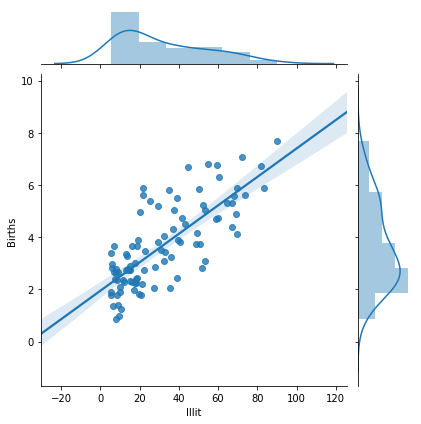

In [82]:
sns.jointplot(data['Illit'], data['Births'], kind='reg')

**Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.**

Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [87]:
water=pd.read_csv('water.txt',sep='\t')

In [89]:
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [91]:
stats.pearsonr(water['mortality'], water['hardness'])

(-0.6548486232042465, 1.0331339260349571e-08)

**В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки**

In [92]:
stats.spearmanr(water['mortality'], water['hardness'])

SpearmanrResult(correlation=-0.6316646189166502, pvalue=4.79546153722838e-08)

**Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.**

In [94]:
south=water[water['location']=='South']

In [100]:
north=water[water['location']=='North']

In [97]:
stats.pearsonr(south['mortality'], south['hardness'])

(-0.6021532715484158, 0.0011346743048161927)

In [102]:
stats.pearsonr(north['mortality'], north['hardness'])

(-0.3685978383288718, 0.029344659047110606)

**Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин**

**Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.**

In [108]:
import math

In [162]:
a=203
b=718
c=239
d=515


In [163]:
mcc=(a*d - b*c)/math.sqrt((a+b)*(a+c)*(b+d)*(c+d))

In [164]:
mcc

0.10900237458678963

**В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили 5.5\times10^{-8}5.5×10 
−8
 , нужно ввести 8).**

In [160]:
obs = np.array([[203,239], [718,515]])

In [161]:
stats.chi2_contingency(obs)

(19.40753078854304,
 1.0558987006638725e-05,
 1,
 array([[243.03402985, 198.96597015],
        [677.96597015, 555.03402985]]))

In [165]:
1.0558987006638725e-05 
# отверргаем гипотезу что MCC = 0 ,значит связ между полом и частотой посещения бара есть! и она обратная. мужчины пьют чаще

1.0558987006638725e-05

**В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.**

In [129]:
import scipy

In [138]:
def proportions_confint_diff_ind(p1, count1, p2, count2, alpha = 0.05):    
    z = scipy.stats.norm.ppf (1 - alpha / 2.)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1. - p1)/ count1 + p2 * (1 - p2)/ count2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1. - p1)/ count1 + p2 * (1 - p2)/ count2)
    
    return (left_boundary, right_boundary)

In [141]:
p1=239/(239+515)

In [142]:
p2=203/(203+718)

In [143]:
proportions_confint_diff_ind(p1, (239+515), p2, (203+718), alpha = 0.05)

(0.053905233215813156, 0.13922183141523897)

**Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили 5.5\times10^{-8}5.5×10 
−8
 , нужно ввести 8)**

In [151]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = np.sum(sample1)
    n2 = np.sum(sample2)
    
    p1 = sample1[0] / n1
    p2 = sample2[0] / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [152]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [153]:
("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_ind([203,718], [239,515])))

'p-value: 0.000008'

ДОЛИ НЕ РАВНЫ!

**Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"**

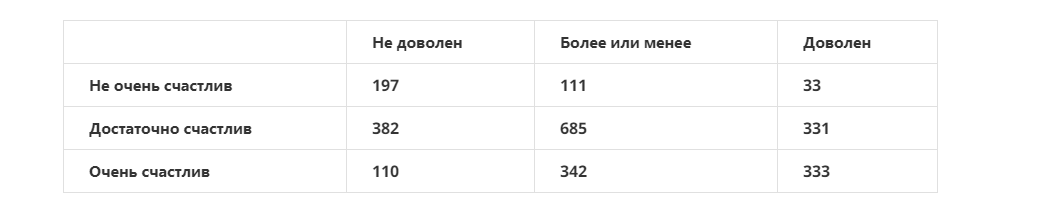

In [154]:
from IPython.display import Image
Image("КСИ.png")

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [155]:
happiness = np.array( [[197., 111., 33. ],
                       [382., 685., 331.],
                       [110., 342., 333.]] )

In [166]:
scipy.stats.chi2_contingency(happiness)
# корреляция есть. и сущщественная 

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[ 93.08597464, 153.74722662,  94.16679873],
        [381.6251981 , 630.318542  , 386.0562599 ],
        [214.28882726, 353.93423138, 216.77694136]]))

**На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили 5.5\times10^{-8}5.5×10 
−8
 , нужно ввести 8)**

In [157]:
scipy.stats.chi2_contingency(happiness)[1]

2.4964299580093467e-62

**Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.**

In [167]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [168]:
cramers_stat(happiness)

0.2412013934500338

In [169]:
happiness.shape

(3, 3)